# Importing Relevant Liabraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Exploring The Data

In [2]:
raw_data=pd.read_csv('CarPricePrediction_.csv')

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
raw_data.shape

(4345, 9)

In [5]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
df=raw_data.dropna()
data1=df.drop('Model',axis=1)


In [7]:
data1.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [8]:
data1.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [9]:
data1.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [10]:
data1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Dealing With Outliers

In [11]:
data2 = data1[
            (data1['Mileage'] <=data1['Mileage'].quantile(.99)) &
            (data1['EngineV'] <= data1['EngineV'].quantile(.99)) &
            
           
            (data1['Mileage'] >= data1['EngineV'].quantile(.01)) &
            (data1['EngineV'] >= data1['EngineV'].quantile(.01)) 
            
            
            ]

data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3667 entries, 0 to 4344
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         3667 non-null   object 
 1   Price         3667 non-null   float64
 2   Body          3667 non-null   object 
 3   Mileage       3667 non-null   int64  
 4   EngineV       3667 non-null   float64
 5   Engine Type   3667 non-null   object 
 6   Registration  3667 non-null   object 
 7   Year          3667 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 257.8+ KB


In [12]:
data3=data2.drop('Year',axis=1)
data3=pd.get_dummies(data3,drop_first=True)


In [13]:
data3.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [14]:
log_price = np.log(data3['Price'])
data3['log_price'] = log_price
data=data3.drop('Price',axis=1)

# Declaring Inputs and Targets


In [15]:
x=data.drop('log_price',axis=1) 
y=data['log_price']

In [16]:
x.describe()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
count,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000,3667.000000
mean,171.459504,2.455661,0.160894,0.194982,0.079084,0.111535,0.126807,0.218707,0.064903,0.098718,0.391328,0.098173,0.158440,0.156804,0.025907,0.362694,0.902918
std,89.968535,0.935322,0.367484,0.396241,0.269906,0.314837,0.332802,0.413426,0.246389,0.298324,0.488114,0.297589,0.365203,0.363665,0.158879,0.480843,0.296110
min,2.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,105.000000,1.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,165.000000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,232.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,433.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
y.describe()

count    3667.000000
mean        9.344256
std         0.864066
min         6.396930
25%         8.852879
50%         9.305651
75%         9.898475
max        12.611538
Name: log_price, dtype: float64

# Splitting The Data

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train.shape,x_test.shape

((2933, 17), (734, 17))

# Normalization

In [20]:
# Normalizing The Inputs
import tensorflow as tf
from tensorflow import keras

In [21]:
x=tf.keras.utils.normalize(x)
x.shape

(3667, 17)

In [22]:
print(x)

       Mileage   EngineV  Brand_BMW  Brand_Mercedes-Benz  Brand_Mitsubishi  \
0     0.999948  0.007220   0.003610             0.000000               0.0   
1     0.999969  0.006791   0.000000             0.002342               0.0   
2     0.999887  0.013965   0.000000             0.002793               0.0   
3     0.999830  0.017497   0.000000             0.000000               0.0   
4     0.999757  0.016663   0.000000             0.000000               0.0   
...        ...       ...        ...                  ...               ...   
4338  0.999826  0.015335   0.000000             0.000000               0.0   
4339  0.997333  0.045592   0.000000             0.000000               0.0   
4340  0.933257  0.311086   0.000000             0.103695               0.0   
4342  0.999894  0.010308   0.005154             0.000000               0.0   
4344  0.999772  0.016125   0.000000             0.000000               0.0   

      Brand_Renault  Brand_Toyota  Brand_Volkswagen  Body_hatch

# Creating The Model

In [23]:
input_size=17
output_size=1

model=tf.keras.Sequential([
    
                            
                            tf.keras.layers.Dense(17,activation='softplus'),
    
                            tf.keras.layers.Dense(60,activation='softplus'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(20,activation='softplus'),
                            tf.keras.layers.Dropout(0.2),
                            
                            
                            
                            tf.keras.layers.Dense(1,activation='softplus')
                    
                        ])

model.compile(optimizer=tf.keras.optimizers.Adam(0.002),loss='mean_absolute_error', )


history=model.fit(x_train, y_train, epochs=200, validation_split = 0.1,verbose=2)
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

Epoch 1/200
83/83 - 1s - loss: 6.5729 - val_loss: 3.9891
Epoch 2/200
83/83 - 0s - loss: 2.6409 - val_loss: 1.5702
Epoch 3/200
83/83 - 0s - loss: 1.8891 - val_loss: 0.7689
Epoch 4/200
83/83 - 0s - loss: 1.6310 - val_loss: 1.5122
Epoch 5/200
83/83 - 0s - loss: 1.5374 - val_loss: 1.2687
Epoch 6/200
83/83 - 0s - loss: 1.4318 - val_loss: 1.2457
Epoch 7/200
83/83 - 0s - loss: 1.3966 - val_loss: 0.7413
Epoch 8/200
83/83 - 0s - loss: 1.3163 - val_loss: 0.4523
Epoch 9/200
83/83 - 0s - loss: 1.3410 - val_loss: 0.6214
Epoch 10/200
83/83 - 0s - loss: 1.3693 - val_loss: 0.4692
Epoch 11/200
83/83 - 0s - loss: 1.2900 - val_loss: 0.4464
Epoch 12/200
83/83 - 0s - loss: 1.2609 - val_loss: 0.7436
Epoch 13/200
83/83 - 0s - loss: 1.2772 - val_loss: 0.4059
Epoch 14/200
83/83 - 0s - loss: 1.3090 - val_loss: 0.5673
Epoch 15/200
83/83 - 0s - loss: 1.1990 - val_loss: 0.5685
Epoch 16/200
83/83 - 0s - loss: 1.1729 - val_loss: 0.6775
Epoch 17/200
83/83 - 0s - loss: 1.2089 - val_loss: 0.6003
Epoch 18/200
83/83 - 0s

Epoch 142/200
83/83 - 0s - loss: 0.3660 - val_loss: 0.3023
Epoch 143/200
83/83 - 0s - loss: 0.3656 - val_loss: 0.3157
Epoch 144/200
83/83 - 0s - loss: 0.3607 - val_loss: 0.3242
Epoch 145/200
83/83 - 0s - loss: 0.3698 - val_loss: 0.3476
Epoch 146/200
83/83 - 0s - loss: 0.3609 - val_loss: 0.3047
Epoch 147/200
83/83 - 0s - loss: 0.3627 - val_loss: 0.3064
Epoch 148/200
83/83 - 0s - loss: 0.3660 - val_loss: 0.3192
Epoch 149/200
83/83 - 0s - loss: 0.3591 - val_loss: 0.3062
Epoch 150/200
83/83 - 0s - loss: 0.3536 - val_loss: 0.3330
Epoch 151/200
83/83 - 0s - loss: 0.3570 - val_loss: 0.3140
Epoch 152/200
83/83 - 0s - loss: 0.3604 - val_loss: 0.3119
Epoch 153/200
83/83 - 0s - loss: 0.3567 - val_loss: 0.3094
Epoch 154/200
83/83 - 0s - loss: 0.3537 - val_loss: 0.3274
Epoch 155/200
83/83 - 0s - loss: 0.3605 - val_loss: 0.3311
Epoch 156/200
83/83 - 0s - loss: 0.3568 - val_loss: 0.3134
Epoch 157/200
83/83 - 0s - loss: 0.3534 - val_loss: 0.3264
Epoch 158/200
83/83 - 0s - loss: 0.3461 - val_loss: 0.33

# Training Loss VS Validation Loss

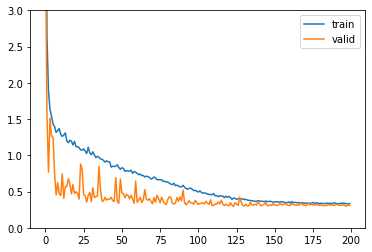

In [29]:
import matplotlib.pyplot as plt

plt.plot(hist['loss'])
plt.plot(hist['val_loss'],)
plt.ylim(0,3)
plt.legend(("train" , "valid") , loc =0)

In [25]:
model.evaluate(x_train,y_train)

92/92 [==============================] - 0s 2ms/step - loss: 0.2954


0.29538556933403015

In [26]:
model.evaluate(x_test,y_test)

23/23 [==============================] - 0s 1ms/step - loss: 0.3139


0.31390437483787537

# Predictions

(8.3, 12.0)

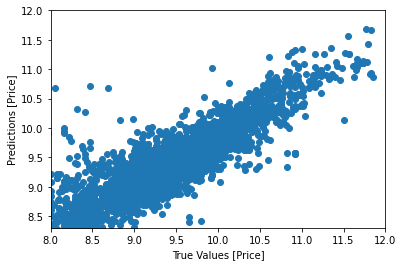

In [27]:
train_predictions =model.predict(x_train).flatten()
a = plt.axes()
plt.scatter(y_train, train_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.xlim(8,12)
plt.ylim(8.3,12)

# Exploring the ERROR

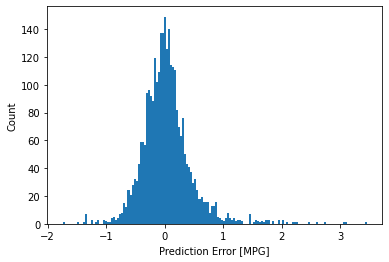

In [28]:
error = train_predictions - y_train
plt.hist(error, bins=150)

plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')            